# 문자를 읽을 수 있는 딥러닝
## 기계가 읽을 수 있나요?
#### 사람이 문자를 읽을 떄의 과정
1. 문자가 있다는 것을 인식(Detection)
2. 인식한 문자를 해독(Recognition)
## 어떤 과정으로 읽을까요?
구글 API에서는 문자의 영역을 사각형으로 표현하고 우측에 Block과 Paragraph로 구분해서 인식 결과를 나타냄

#### 문자 모델은 보통 두 단계
- Text Detection(문자검출), 입력받은 사진 속에서 문자의 위치를 찾음
- Text Recognition(문자인식), 찾은 문자 영역으로부터 문자를 읽어내는 것

## 딥러닝 문자인식의 시작
1998년에 발표된 LeNet은 우편번호나 손글씨를 읽기 위해서 만들어졌다.

MNIST로 LeNet을 훈련시킨다면 우편번호를 읽을 수 있는 것

#### LeNet-5
구조는 상당히 간단함.

Convolution 레이어와 최종 출력 레이어로 이루어져 있다.

## 사진 속 문자 찾아내기
사진 속 문자를 찾아내는 최근의 딥러닝 모델은 일반적인 Object Detection(객체 인식) 방법으로 접근

이미지 속에서 물체를 찾아내는 딥러닝 모델에게 문자를 찾도록 학습을 시킨 것

문자의 특성에 따라서 모델을 변경해 주기도 함

#### 딥러닝 기반 객체 검출 방법
- Regression(회귀
__ 기준으로 하는 박스 대비 문자의 박스가 얼마나 차이가 나는지를 학습
- Segmentation(세그멘테이션)
__ 픽셀 단위로 해당 픽셀이 문자를 표현하는지를 분류하는 문제(pixel-wise classification)
#### 문자인식
사진 속에서 문자를 검출해 내는 검출 모델이 영역을 잘라서 주면 그 영역에 어떤 글자가 포함되어 있는지 읽어내는 과정
#### 문자인식 모델
작게 잘린 이미지가 들어오면 이미지 속에 어떤 단어가 포함됐는지 찾아냄
#### CRNN
이미지 내의 문자 인식 모델의 기본적인 방법 중 하나가 바로 CNN과 자연어 처리를 하는 RNN을 결합한 모델

이미지 내의 텍스트와 연관된 특징을 CNN을 통해 추출한 후에 스텝 단위의 문자 정보를 RNN으로 인식하는 것

검출 결과로부터 인식 모델을 통해 문자를 인식하고 나면 구글 API의 결과처럼 사진 속 영역에 표시를 하고 그 영역에 어떤 문자가 적혀있는지 알 수 있는 OCR 시스템이 된다.

## keras-ocr 
keras-ocr은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해줌

검출 모델로는 CRAFT(Character Region Awareness for Text Detection)를 사용하고, 인식 모델로는 앞에서 설명한 CRNN을 사용

In [1]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [2]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

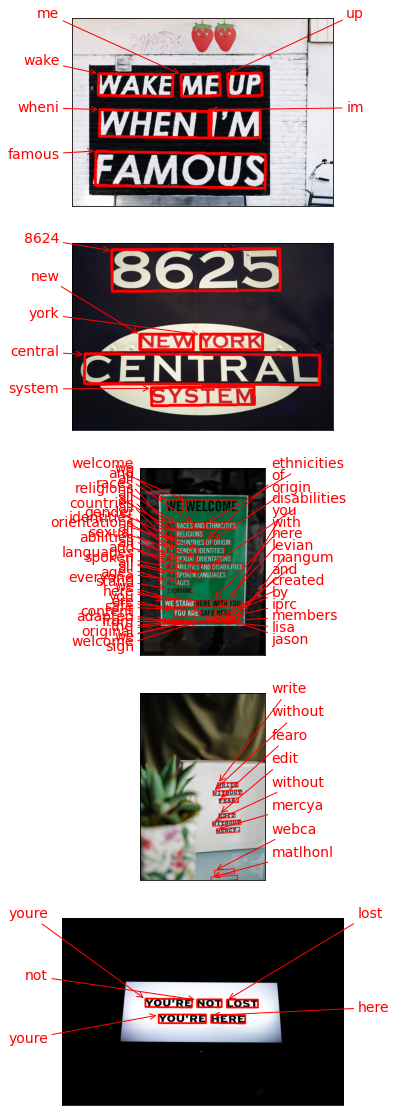

In [3]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 테서랙트 
테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tesseract.js등으로 확장되는 등 많은 곳에서 사용

버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원

# 프로젝트 : 다양한 OCR모델 비교하기
## 검증용 데이터셋 준비

In [2]:
import os
import glob

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as img

# keras-ocr
import keras_ocr

# tesseract
import pytesseract
from PIL import Image
from pytesseract import Output
import re

# Google OCR API
from google.cloud import vision
import io
from PIL import ImageDraw

In [5]:

data_path = os.getenv('HOME')+'/aiffel/ocr_python/test_image/'

In [6]:
images_path = glob.glob(data_path+"*.jpg")
images_path

['/aiffel/aiffel/ocr_python/test_image/무파마.jpg',
 '/aiffel/aiffel/ocr_python/test_image/스낵렵.jpg',
 '/aiffel/aiffel/ocr_python/test_image/나가사끼.jpg',
 '/aiffel/aiffel/ocr_python/test_image/사리곰탕.jpg',
 '/aiffel/aiffel/ocr_python/test_image/참깨.jpg',
 '/aiffel/aiffel/ocr_python/test_image/열.jpg',
 '/aiffel/aiffel/ocr_python/test_image/짜장.jpg',
 '/aiffel/aiffel/ocr_python/test_image/컵.jpg',
 '/aiffel/aiffel/ocr_python/test_image/신.jpg',
 '/aiffel/aiffel/ocr_python/test_image/라면.jpg',
 '/aiffel/aiffel/ocr_python/test_image/멸치칼국수.jpg',
 '/aiffel/aiffel/ocr_python/test_image/틈새.jpg',
 '/aiffel/aiffel/ocr_python/test_image/진짬뽕.jpg',
 '/aiffel/aiffel/ocr_python/test_image/불닭.jpg',
 '/aiffel/aiffel/ocr_python/test_image/비빔면.jpg',
 '/aiffel/aiffel/ocr_python/test_image/진.jpg',
 '/aiffel/aiffel/ocr_python/test_image/컵누들.jpg',
 '/aiffel/aiffel/ocr_python/test_image/편의점.jpg',
 '/aiffel/aiffel/ocr_python/test_image/짜짜로니.jpg',
 '/aiffel/aiffel/ocr_python/test_image/미식.jpg']

In [9]:
plt.figure(figsize=(15, 15))

for i, image in enumerate(images_path,1):
    plt.subplot(5, 3, i)
    plt.imshow(img.imread(image))
    plt.axis('off')

ValueError: num must be 1 <= num <= 15, not 16

### keras-ocr test

In [11]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [12]:
images = [keras_ocr.tools.read(im) for im in images_path]
predictions = [pipeline.recognize([im]) for im in images_path]

In [13]:
fig, axs = plt.subplots(5, 3, figsize=(30, 30))
for a in range(len(axs)):
    for b in range(len(axs[a])):
        keras_ocr.tools.drawAnnotations(image=images[3*a+b], 
                                    predictions=predictions[3*a+b][0], ax=axs[a,b])

### Tesseract test

In [14]:
def detect_box(image_path):
    filename = os.path.basename(image_path)
    # read the image and get the dimensions
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    n_boxes = len(d['text'])

    # draw the bounding boxes on the image
    for i in range(n_boxes):
        if int(d['conf'][i]) > 1: # confidence가 1 이상인 값들만
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            text = d['text'][i]
            text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
            cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        1.5, (0, 0, 255), 3)
    return img

ValueError: num must be 1 <= num <= 15, not 16

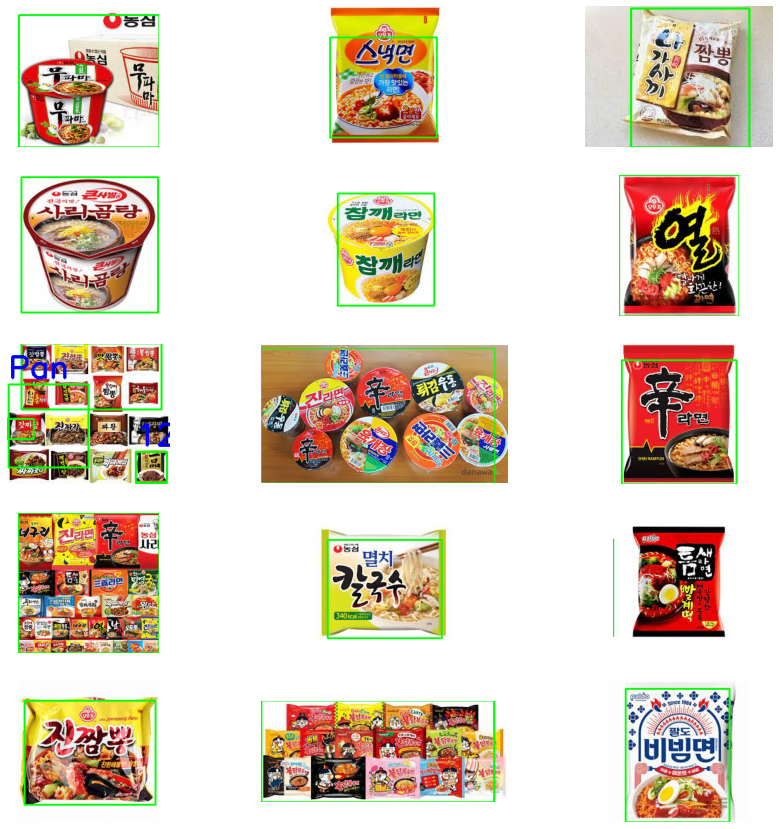

In [15]:
# confidence = 1
plt.figure(figsize=(15, 15))
for i,image_path in enumerate(images_path,1):
    img = detect_box(image_path)
    plt.subplot(5, 3, i)
    plt.imshow(img)
    plt.axis('off')

In [16]:
def extract_text(image_path):
    custom_oem_psm_config = r'--oem 3 --psm 11'
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    txt = pytesseract.image_to_string(img, lang='eng',config=custom_oem_psm_config)
    txt = re.sub(r"\n+"," ",txt)
    return txt

In [18]:
compare_ocr('진.jpg')extract_text(images_path[0])

SyntaxError: invalid syntax (2203820175.py, line 1)

In [19]:
for image_path in images_path:
    filename = os.path.basename(image_path)
    txt = extract_text(image_path)
    txt = "".join([c if ord(c) < 128 else "" for c in txt]).strip()
    print(f'========{filename}========')
    print(txt)

========무파마.jpg========
sa = aN a (cs it | mayer. = Fi 2h ya.
========스낵렵.jpg========
ie =)
========나가사끼.jpg========
i, 1 She [ES d)
========사리곰탕.jpg========
ai Alera
========참깨.jpg========
BSrna= ae > ee St
========열.jpg========
Ko pit)
========짜장.jpg========
bad ee] El = alle Eeliel*2) lal
========컵.jpg========
fs eat! eras SY oe cS fo) (Ve Noes  zs. DNR wa  a
========신.jpg========
Bal we 74) Ain) Ws cut sh ES.
========라면.jpg========
432 fe  Atel ual a ees Lae ie) saat | age. SD ae vn Pail Gees
========멸치칼국수.jpg========
FF ay] 2 = 3 or oe =
========틈새.jpg========
i cy th
========진짬뽕.jpg========
ay ae 4) ee
========불닭.jpg========
ot
========비빔면.jpg========
Qe sites Gs GX & Ga aie (O
========진.jpg========
x Ala Tah fhe EL yd aaa
========컵누들.jpg========
SS SS et 3
========편의점.jpg========
a cam TS wat a7}
========짜짜로니.jpg========
ee gS. 2 | we I
========미식.jpg========
>) ran %


### Google OCR API

In [20]:
def detect_text(path):
    """Detects text in the file."""
    text_dec = []
    bounds = []
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    name = os.path.basename(path)
    
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    for text in texts:
        text_dec.append(text.description.replace('\n',''))
        vertices = text.bounding_poly
        bounds.append(vertices)
    
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
    return name, text_dec, bounds

In [21]:
def draw_boxes(image, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    for bound in bounds:
        draw.polygon([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y], None, color)
    return image

In [22]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

total 60408
drwxr-xr-x 4 root root     4096 Feb 21 02:05  bert_qna
drwxr-xr-x 4 root root     4096 Jan 17 01:36  camera_sticker
drwxr-xr-x 4 root root     4096 Feb  8 07:08  chest_xray
drwxr-xr-x 4 root root     4096 Feb 14 10:14  dcgan_newimage
-rw-r--r-- 1 root root   174659 Jan 12 17:29 '[E-02]Classification.ipynb'
-rw-r--r-- 1 root root  1321676 Jan 18 03:12 '[E-03]CameraSticker.ipynb'
-rw-r--r-- 1 root root    26957 Jan 20 08:01 '[E-04]Iyricist.ipynb'
-rw-r--r-- 1 root root   172984 Jan 27 08:31 '[E-06]Moviereview.ipynb'
-rw-r--r-- 1 root root    80950 Jan 24 03:25 '[E-06]Moviereview_P.ipynb'
-rw-r--r-- 1 root root  4883214 Feb  3 12:32 '[E-07]Segmentation.ipynb'
-rw-r--r-- 1 root root   165815 Feb  8 05:46 '[E-08]NewsSummarization.ipynb'
-rw-r--r-- 1 root root   147107 Feb  4 05:16 '[E-08]NewsSummarization_P.ipynb'
-rw-r--r-- 1 root root   640342 Feb 10 01:58 '[E-09]MedicalImageAnalysis.ipynb'
-rw-r--r-- 1 root root  3370858 Feb 15 13:57 '[E-10]DcganNewimage.ipynb'
-rw-r--r-- 1 r

In [23]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

In [24]:
for path in images_path:
    detect_text(path)

PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #1066280835610 by visiting https://console.developers.google.com/billing/enable?project=1066280835610 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=1066280835610"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/1066280835610"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

In [25]:
ocr_img = []
ocr_dict = {}
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for path in images_path:
    name, text_dec, bounds = detect_text(path)
    ocr_dict[name] = text_dec
    image = Image.open(path)
    draw_boxes(image, bounds, 'red')
    ocr_img.append(image)

PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #1066280835610 by visiting https://console.developers.google.com/billing/enable?project=1066280835610 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=1066280835610"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/1066280835610"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

In [26]:
plt.figure(figsize=(15, 15))

for i, img in enumerate(ocr_img, 1):
    plt.subplot(5, 3, i)
    plt.imshow(img)
    plt.axis('off')

<Figure size 1080x1080 with 0 Axes>

## 테스트 결과
### keras-ocr

In [27]:
def show_keras(num):
    keras_ocr.tools.drawAnnotations(image=images[num], predictions=predictions[num][0])

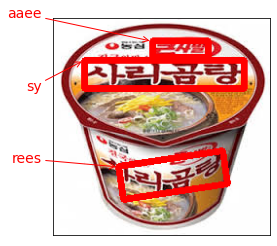

In [28]:
show_keras(3)

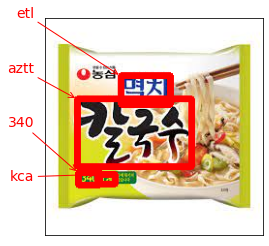

In [29]:
show_keras(10)

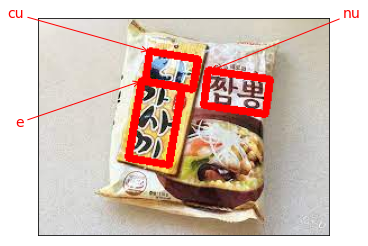

In [30]:
show_keras(2)

In [31]:
show_keras(4)

### Tesseract

In [32]:
def show_tesseract(num):
    plt.figure(figsize=(15, 15))

    plt.subplot(121)
    org = cv2.imread(images_path[num])
    org = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)
    plt.imshow(org)
    plt.title('Original')
    plt.subplot(122)
    img = detect_box(images_path[num])
    plt.imshow(img)
    plt.title('Detected')
    txt = extract_text(images_path[num])
    print(txt)

In [33]:
show_tesseract(8)

Bal we 74) Ain) Ws cut sh ES. 


ot 


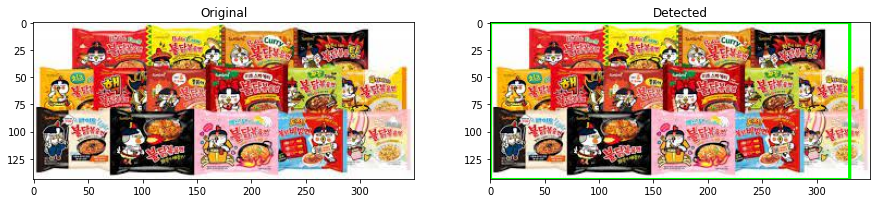

In [36]:
show_tesseract(13)

i cy th 


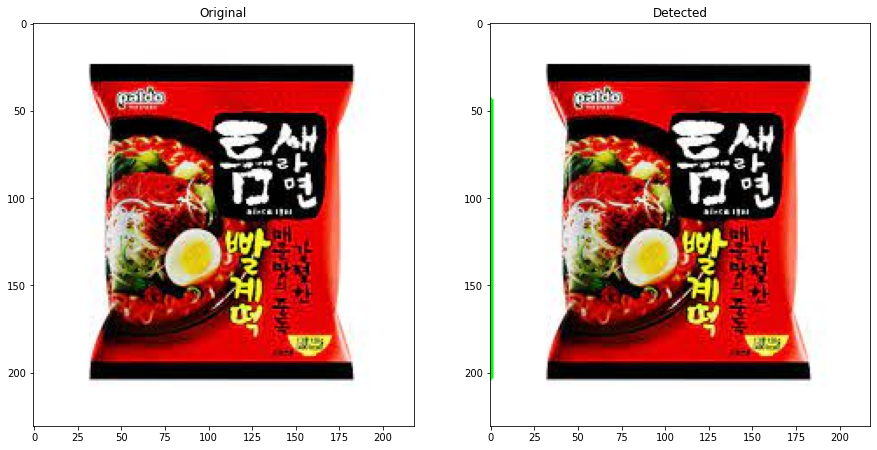

In [35]:
show_tesseract(11)

### Google OCR API

In [37]:
def show_google(num):
    name, text_dec, bounds = detect_text(images_path[num])
    image = Image.open(images_path[num])
    
    plt.figure(figsize=(15, 15))
    plt.subplot(121)
    org = image
    plt.imshow(org)
    plt.title('Original')
    plt.subplot(122)
    img = draw_boxes(image, bounds, 'red')
    plt.imshow(img)
    plt.title('Detected')
    print(text_dec[0])

In [38]:
show_google(7)

PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #1066280835610 by visiting https://console.developers.google.com/billing/enable?project=1066280835610 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=1066280835610"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/1066280835610"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

## 회고
Tesseract 테스트가 가장 글자를 잘 인식한 것으로 보인다.
한글이 인식이 됐다가 안됐다가 하는데 조금 더 공부해서 다시 해봐야할 것 같다.
영어로 된 파일을 먼저 시도 해봐야겠다.

Google ocr API가 다들 잘 나온다고 하는데 잘 나오지 않는 이유는 한글을 인식하게 하지 못해서 일것 같다.
